In [33]:
import pandas as pd
from google.cloud import storage
import numpy as np
# Set your GCS credentials file path
credentials_path = 'roofai-404514-9337be0e93e2.json'

# Set your GCS bucket and folder path
bucket_name = 'output_nm_model'
folder_path = 'prediction-NM_properties-2024_01_02T01_33_48_957Z'

# Create a GCS client
storage_client = storage.Client.from_service_account_json(credentials_path)

# Get a reference to the bucket
bucket = storage_client.get_bucket(bucket_name)

# List files in the specified folder
blobs = bucket.list_blobs(prefix=folder_path)

# Create an empty list to hold all the DataFrames
dfs = []

# Iterate over the files in the folder
for blob in blobs:
    gcs_url = f'gs://{bucket_name}/{blob.name}'

    # Load the CSV file directly into a DataFrame
    df = pd.read_csv(gcs_url)
    
    # Modify the DataFrame as needed
    df.drop("success_0_scores", axis=1, inplace=True)
    df['success_1_scores'] = df['success_1_scores'] * 100
    # df['predicted_success'] = np.where(df['success_1_scores'] > 50, 1, 0)
   

    # Append the current DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
universal_df = pd.concat(dfs, ignore_index=True)
universal_df = universal_df.sort_values(by='success_1_scores', ascending=False)



In [34]:

# universal_df.drop("success_0_scores", axis=1, inplace=True)
# universal_df.drop("predicted_success", axis=1, inplace=True)
universal_df

,ATTOM_ID,PROPERTY_ADDRESS_ZIP,COMPANY,STATE,COUNTY,MSA_CODE,DAYS_AGE_PROPERTY,LAND_USE_CODE,OWNER_OCCUPIED,TAX_ASSESSED_VALUE_TOTAL,...,SOL_PAST_12_MONTHS,ALTV,FIRST_LOAN_AMORTIZED,EST_AVAILABLE_EQUITY,LOANTYPE_EQUITY,LOANTYPE_REFI,TOTAL_LOANS,TOTAL_OWNERS,success,success_1_scores
977651,148227848,87109.0,1,35,1,10740.0,13505.0,1002.0,0,56610.0,...,0,94.0,302708.0,19309.0,0,0,3,1,0,96.182674
1238201,187831283,87124.0,1,35,43,10740.0,10220.0,1001.0,0,52100.0,...,0,96.0,294356.0,12201.0,0,0,3,1,0,96.087039
889832,239554294,88310.0,0,35,35,10460.0,2920.0,1001.0,0,88425.0,...,0,100.0,341096.0,904.0,0,0,3,2,0,96.082532
639481,218754127,88310.0,0,35,35,10460.0,4015.0,1001.0,1,96231.0,...,0,98.0,367978.0,6722.0,0,0,3,2,0,95.930976
500221,14948508,87122.0,0,35,1,10740.0,6935.0,1001.0,1,286586.0,...,0,102.0,545766.0,NaN,0,0,3,2,0,95.881379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760321,232188838,87571.0,0,35,55,45340.0,NaN,7777.0,1,853.0,...,0,NaN,NaN,NaN,0,0,0,1,0,2.837139
516221,226713048,87068.0,0,35,61,10740.0,NaN,1000.0,1,10811.0,...,0,NaN,NaN,NaN,0,0,0,2,0,2.836557
334663,226682249,87002.0,0,35,61,10740.0,NaN,1000.0,1,4000.0,...,0,NaN,NaN,NaN,0,0,0,2,0,2.836557
497129,301774183,87510.0,0,35,39,21580.0,NaN,1000.0,0,987237.0,...,0,NaN,NaN,NaN,0,0,0,1,0,2.835137


In [35]:
# Import the BigQuery client library
from google.cloud import bigquery

# Set up BigQuery client
client = bigquery.Client()

# train_df.to_gbq('')  

client = bigquery.Client()
table_id = 'roofai-404514.ML_RESULTS.outputs_NM_model'

job = client.load_table_from_dataframe(
    universal_df, table_id
)




# Data Plotting

In [9]:
# Create a new DataFrame with the modified 'success_1_scores' column
new_data = {'modified_success_1_scores': universal_df['success_1_scores'].astype(int)}
new_df = pd.DataFrame(new_data)

# Display the new DataFrame
print(new_df)

         modified_success_1_scores
7057305                         98
7603546                         98
4351073                         98
4396755                         98
4045080                         98
...                            ...
3886905                          2
7419049                          2
5155773                          2
1526955                          2
7091227                          2

[9061948 rows x 1 columns]


In [5]:


# Count the occurrences of each unique value in the column
counts = new_df['modified_success_1_scores'].value_counts()

# Create a new DataFrame with counts
count_df = pd.DataFrame({'Score': counts.index, 'Number_of_properties': counts.values})

# Display the new DataFrame
count_df
count_df_new=count_df.iloc[1:]



In [6]:
count_df

,score,Number_of_properties
0,3,2030827
1,2,307191
2,48,133544
3,49,133534
4,50,132530
...,...,...
92,94,2736
93,95,2176
94,96,1136
95,97,629


In [7]:
count_df.to_csv('score_plot.csv', index=False)

In [ ]:
#see it as a line graph with the score on the x-axis, and number of props on y. This way I can look at it like a distribution curve

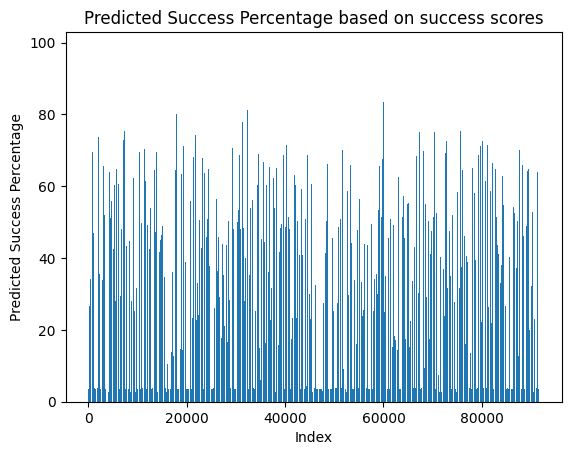

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.bar(df.index, df['success_1_scores'])
plt.xlabel('Index')
plt.ylabel('Predicted Success Percentage')
plt.title('Predicted Success Percentage based on success scores')
plt.show()